<a href="https://colab.research.google.com/github/pavan-potnuru/Bike-sharing-prediction/blob/main/Bike_Sharing_Demand_Prediction(Final)_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
# Importing reguired libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Connecting google drive
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Copy of SeoulBikeData.csv',encoding= 'unicode_escape')

In [ ]:
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
dataset.shape

(8760, 14)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

**Data Summary**

 Date : date of ride
 
 Rented Bike Count : number of rented bikes (numerical)

 Hour : Hour of the day (numerical)

 Temperature(°C) : temperature (numerical)

 Humidity(%) : percentage of humidity (numirical)

 Wind speed (m/s) : speed of wind in m/s (numerical)

 Visibility (10m) : Visibility (numerical)

 Dew point temperature(°C) : temperatur (numerical)

 Solar Radiation (MJ/m2) (numerical)

 Rainfall(mm) (numerical)

 Snowfall (cm) (numerical)

 Seasons  (categorical)

 Holiday (categorical)

 Functioning Day (categorical)


In [ ]:
df = dataset.copy()

In [ ]:
# null value count in each colum
df.isnull().sum().sort_values()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
# Show no. of rows of duplicate rows duplicate rows
df[df.duplicated()].shape 

(0, 14)

In [ ]:
#changing to date type from string
df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%Y').dt.date

In [ ]:
df.describe(include = 'all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [ ]:
#Creating two new features 'month' and 'day_of_month'

df['month'] = pd.to_datetime(df['Date']).dt.month
df['day_of_month'] = pd.to_datetime(df['Date']).dt.day

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,day_of_month
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1


In [ ]:
df.shape

(8760, 16)

# **Univariate analysis**

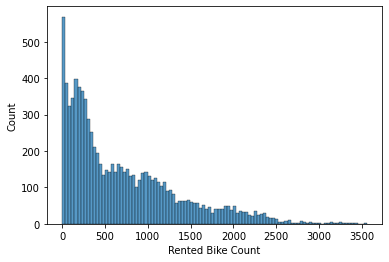

In [ ]:
#Distribution of dependent variable
dep_var = 'Rented Bike Count'
sns.histplot(df[dep_var], bins = 100)
plt.show()

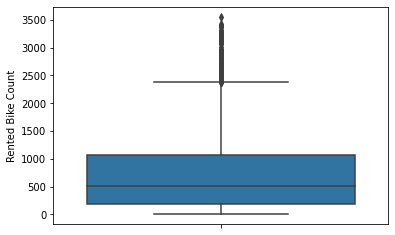

In [ ]:
sns.boxplot(y = df['Rented Bike Count'])
plt.show()

In [ ]:
# creating list of numerical independent variables
num_ind_var = list(set(df.describe().columns) - {dep_var})

# creating list of categorical independent variables
cat_ind_var = list(set(df.columns) - set(df.describe().columns))

In [ ]:
num_ind_var

['Humidity(%)',
 'Dew point temperature(°C)',
 'month',
 'Temperature(°C)',
 'Visibility (10m)',
 'Snowfall (cm)',
 'Rainfall(mm)',
 'Hour',
 'day_of_month',
 'Solar Radiation (MJ/m2)',
 'Wind speed (m/s)']

In [ ]:
cat_ind_var

['Date', 'Holiday', 'Functioning Day', 'Seasons']

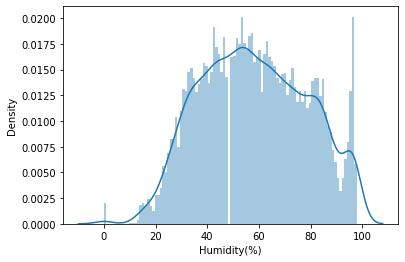

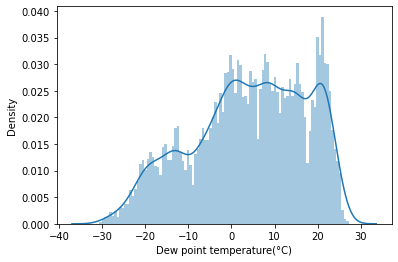

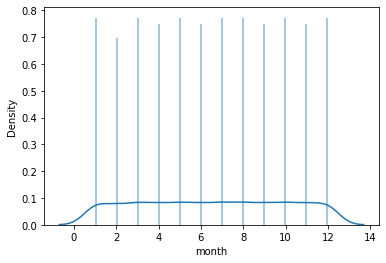

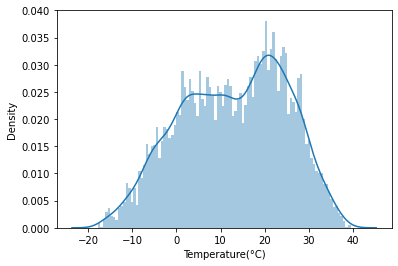

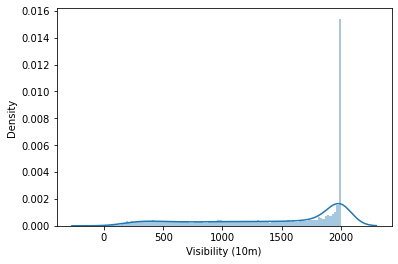

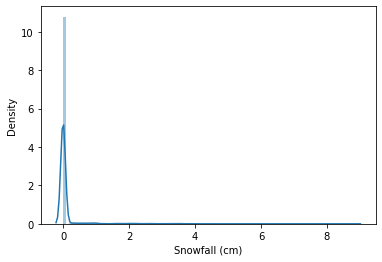

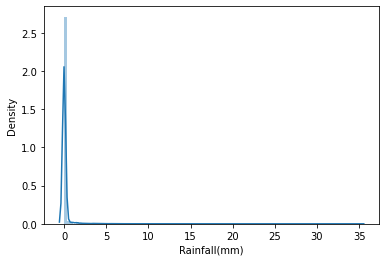

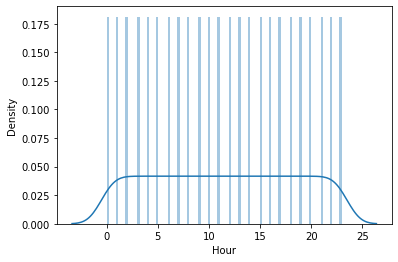

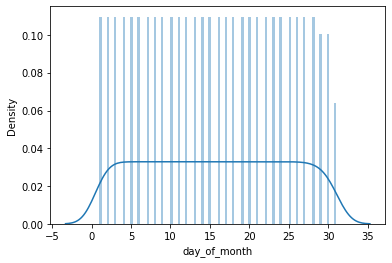

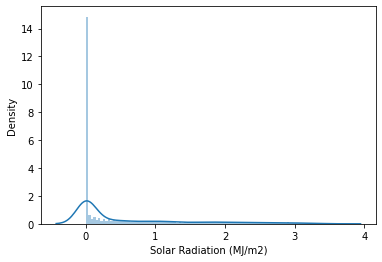

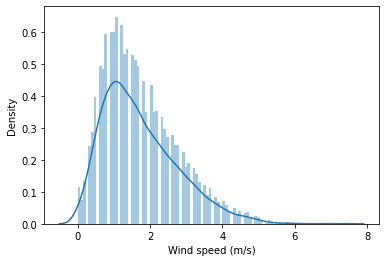

In [ ]:
# distribution of all numerical independent variables
for col in num_ind_var:
  
  sns.distplot(df[col],bins = 100)
 
  plt.show()

Distribution of 'Wind speed', 'snowfall' ,'Rainfall', 'Solar radiation' is positively skewed.

Distribution of 'Visibility', 'Dew point temperature' is negatively skewed.

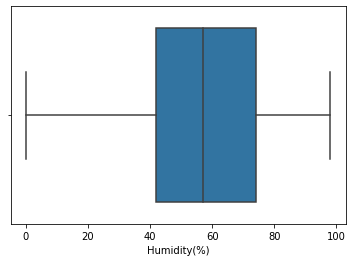

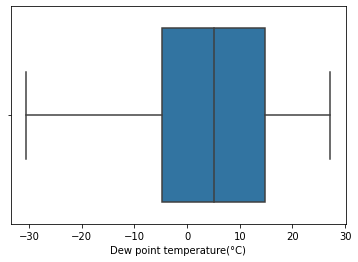

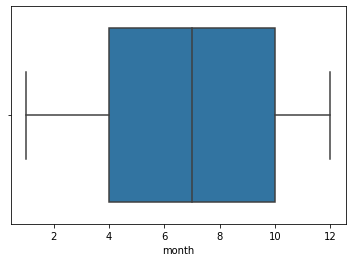

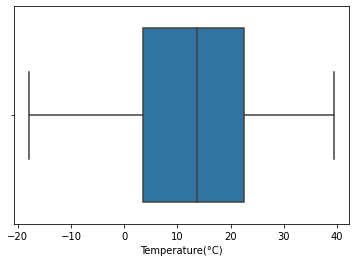

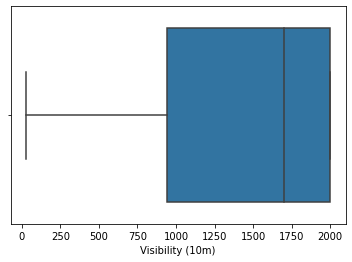

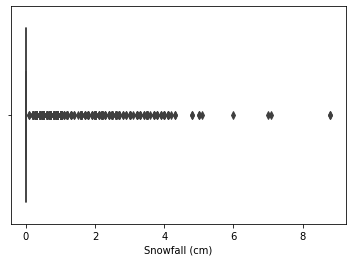

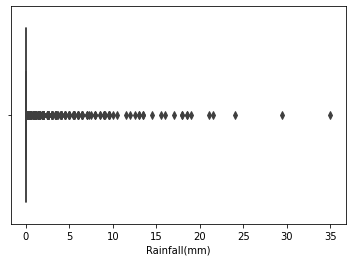

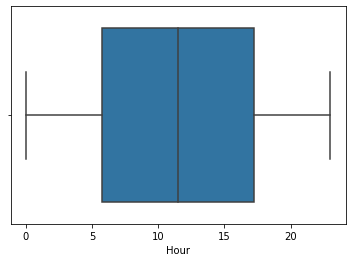

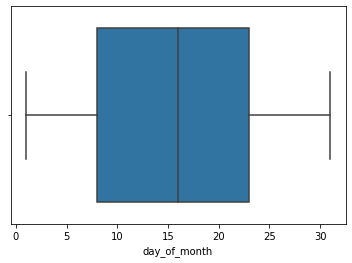

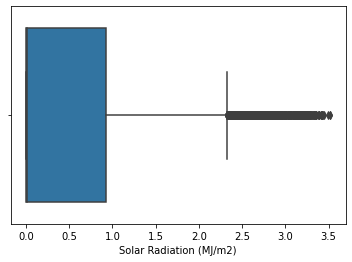

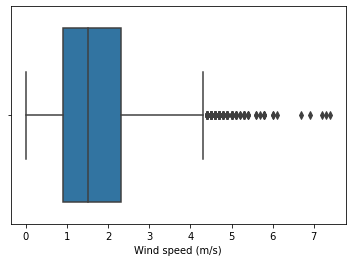

In [ ]:
#box plot for numerical Variables
for col in num_ind_var:
  
  sns.boxplot(df[col])
 
  plt.show()

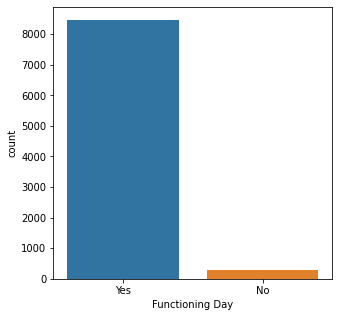

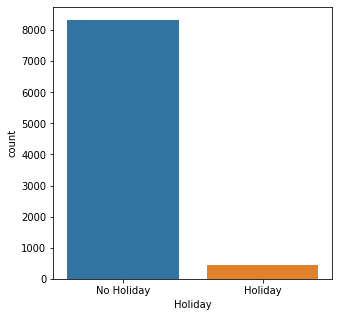

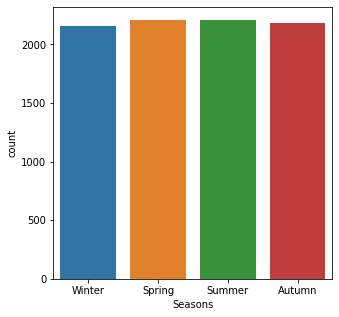

In [ ]:
# Plotting graph for categorical features

for col in ['Functioning Day','Holiday','Seasons']:
  plt.figure(figsize = (5,5))
  sns.countplot(x = df[col])
  plt.show()

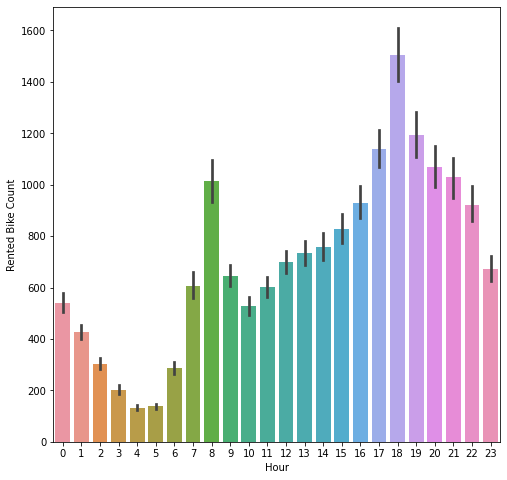

In [ ]:
plt.figure(figsize = (8,8))
sns.barplot(x=df['Hour'],y=df['Rented Bike Count'])
plt.show()

# **Bivariate analysis**

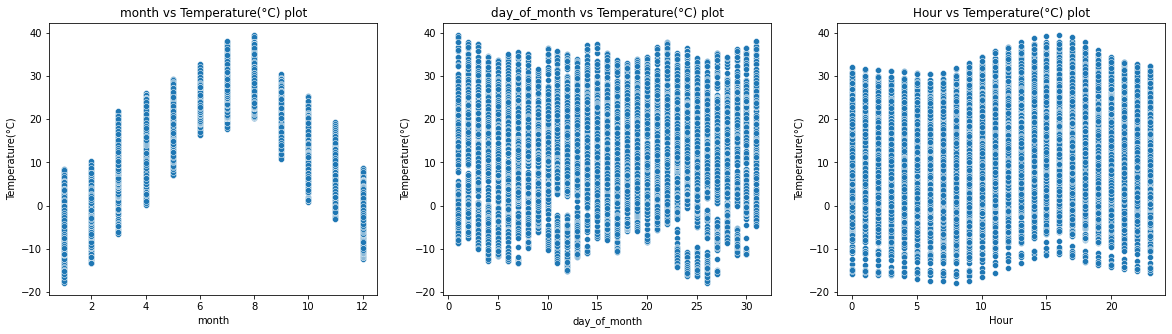

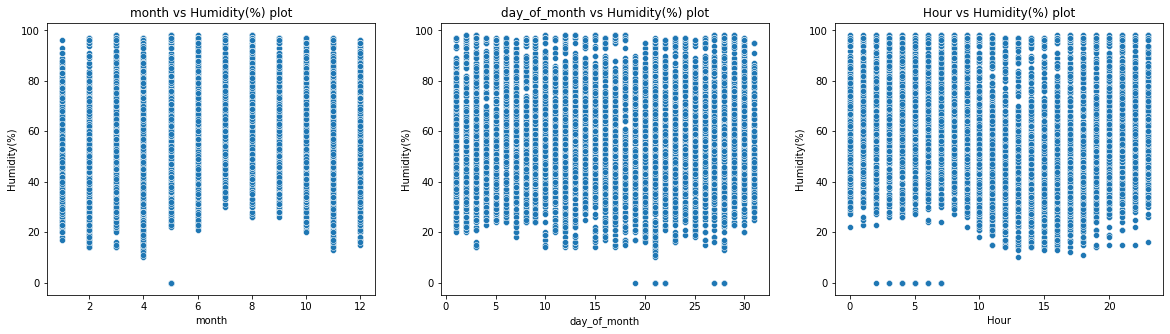

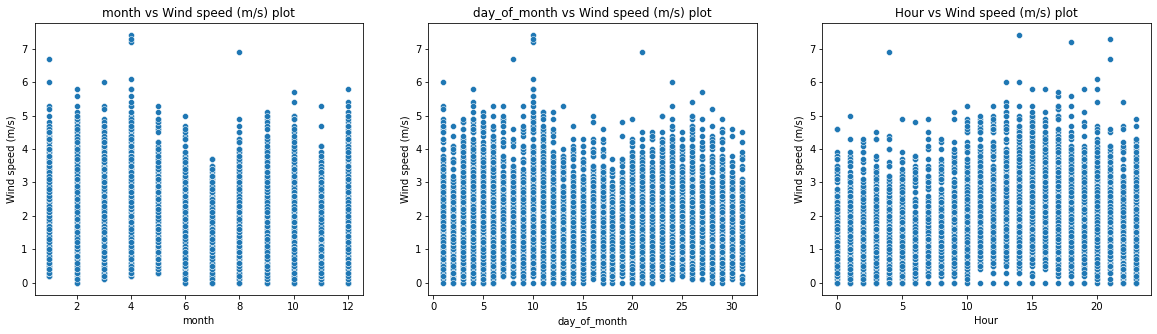

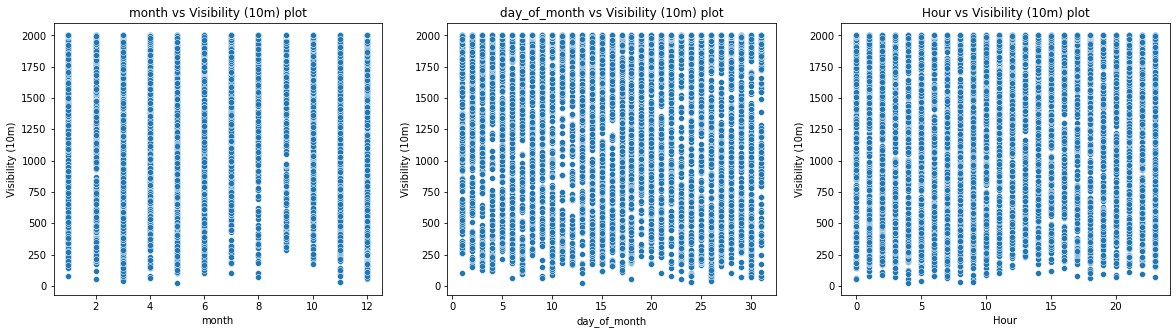

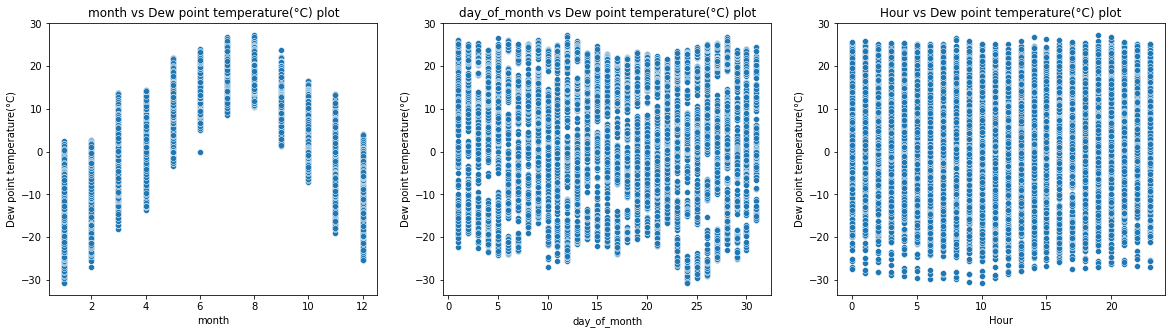

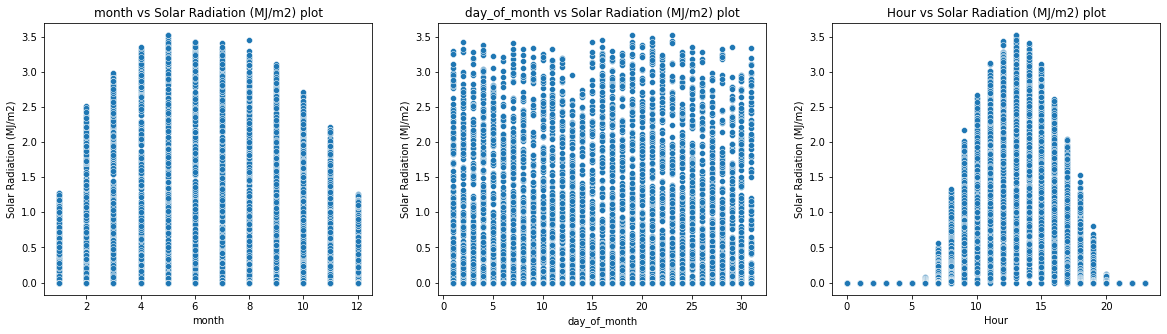

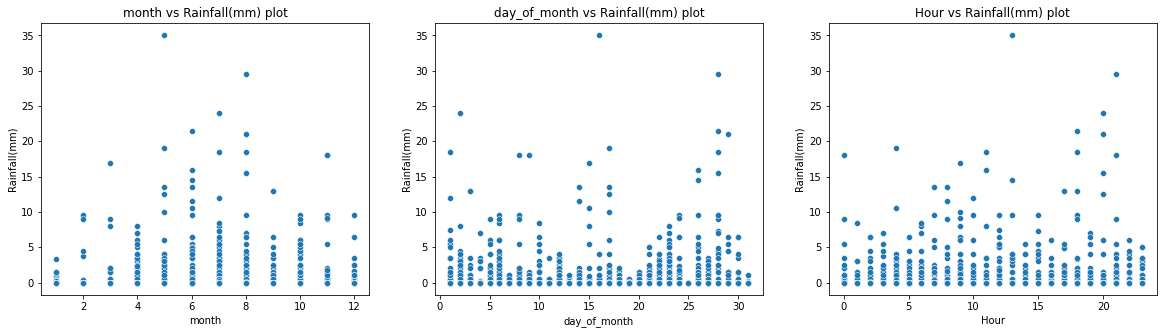

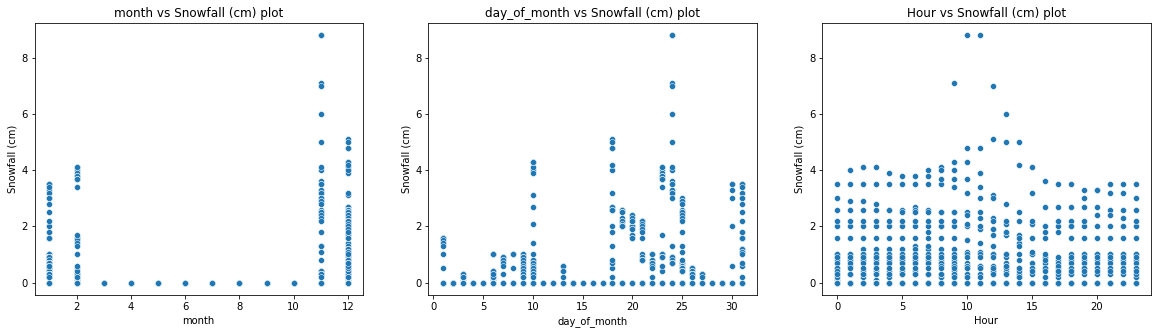

In [ ]:
for col in ['Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']:
    fig, ax = plt.subplots(1, 3, figsize=(20,5))
    for index,col1 in enumerate(['month','day_of_month','Hour']):
      sns.scatterplot(x = df[col1], y = df[col], ax=ax[index])
      ax[index].set_title(f"{col1} vs {col} plot")
    plt.show()
    print('\n\n\n')

Text(0.5, 1.0, ' Average Rented Bike Count vs Date plot')

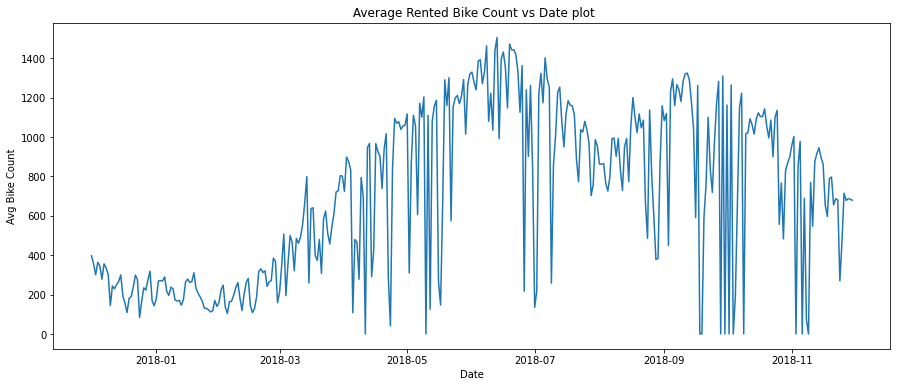

In [ ]:
plt.figure(figsize = (15,6))
grouped = pd.DataFrame(round(df.groupby('Date')['Rented Bike Count'].mean())).rename(columns = {'Rented Bike Count':'Avg Bike Count'})
sns.lineplot(x = grouped.index, y = grouped['Avg Bike Count'])
plt.title(' Average Rented Bike Count vs Date plot')

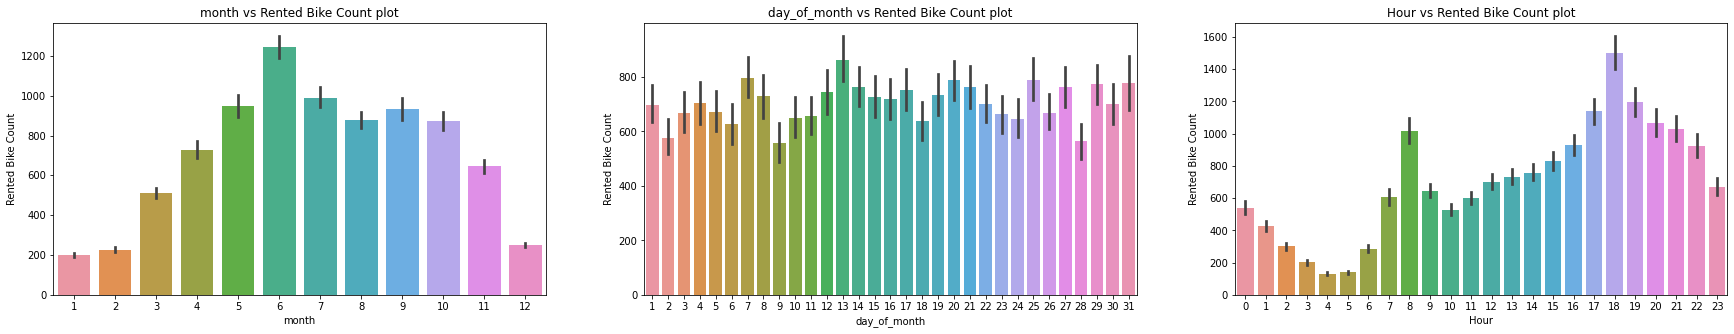

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(30,5))
for index,col1 in enumerate(['month','day_of_month','Hour']):
  sns.barplot(x = df[col1], y = df[dep_var], ax=ax[index])
  ax[index].set_title(f"{col1} vs {dep_var} plot")
plt.show()

In [ ]:
# Dropping 'Date' columns as we have created new features month and day_of_month from it.

df.drop(columns = ['Date'], inplace = True)

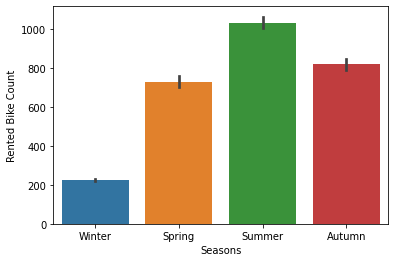

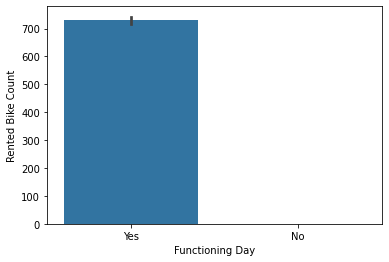

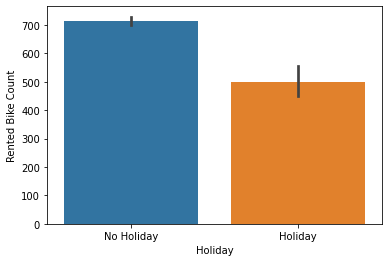

In [ ]:
# Relation of dependent variable with categorical features

for col in ['Seasons','Functioning Day','Holiday']:
  sns.barplot(x = df[col],y = df['Rented Bike Count'])
  plt.show()

Num of bike bookings per hour are low in winter season as compared to other seasons.

On non-functioning day bookings are almost zero.

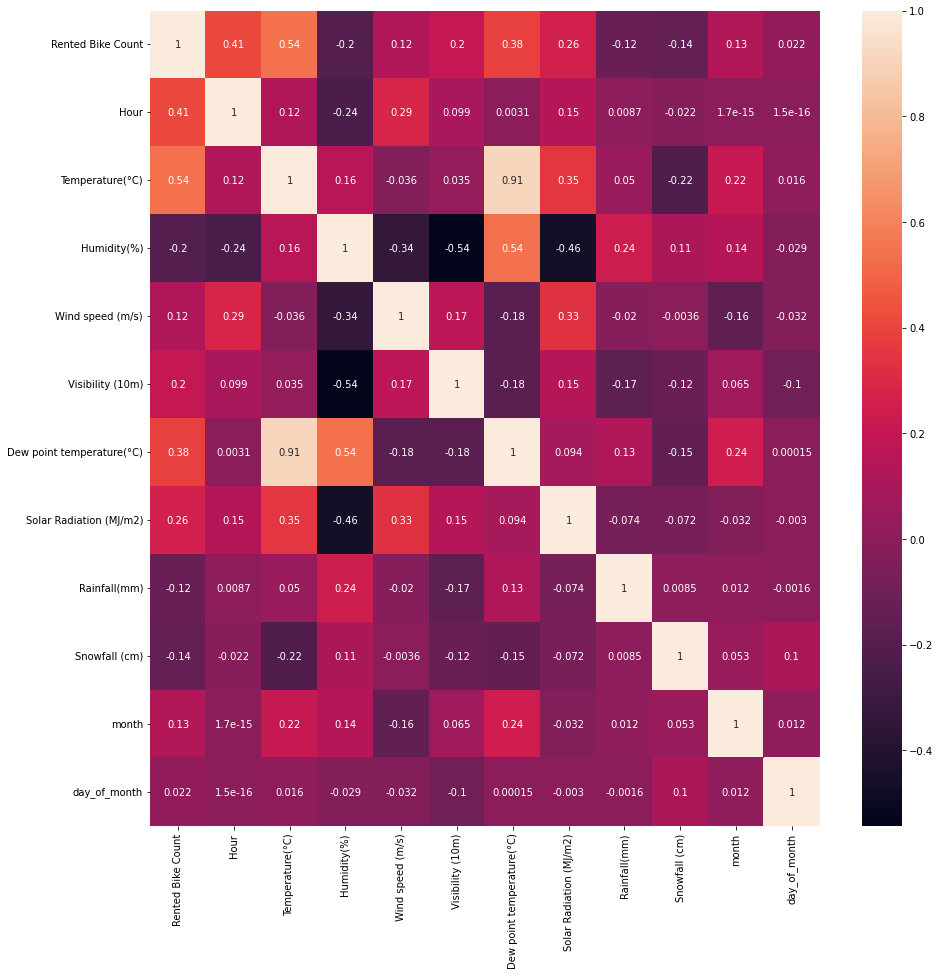

In [ ]:
plt.figure(figsize = (15,15))
corr_df = df.corr()
sns.heatmap(corr_df, annot = True)

Dew point temerature and temperature are highly correlated.

# **Applying models**

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Defining dictionaries for r2_score of different models
test_r2 = {}
train_r2 = {}

In [ ]:
# defining function for dataframe split into train and test datasets
def data_split(df):
  dep_var = 'Rented Bike Count'
  ind_var = list(set(df.columns)-{dep_var})

  y=df[dep_var]
  x=df[ind_var]

  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
  return x_train, x_test, y_train, y_test

In [ ]:
# defining function for model hyperparameter tuning and training
def gridsearch_model_parameters(model,parameter_dict,x_train,y_train):
  rf_grid = GridSearchCV(estimator = model,
                         param_grid = parameter_dict,
                         cv=5, verbose=1, scoring= 'neg_mean_squared_error')
  rf_grid.fit(x_train,y_train)
  print(f"Best Parameters of optimal model: {rf_grid.best_params_}")
  rf_optimal_model = rf_grid.best_estimator_
  return rf_optimal_model

In [ ]:
# defining function for model evaluation
def evaluating_model(model,x_train,x_test,y_train,y_test,transformed = False):
  y_pred = model.predict(x_test)
  y_train_pred = model.predict(x_train)

  # Calculating mse
  print(f'Test Mean squred error : {mean_squared_error(y_test, y_pred)}')
  print(f'Train mean squred error : {mean_squared_error(y_train,y_train_pred)}')

 # Calculating  R2- score
  test_r2 =  r2_score(y_test, y_pred)
  train_r2 =  r2_score(y_train, y_train_pred)

  if transformed == True :   # We have applied sqrt transformation on our dependent  variable then 
     test_r2 =  r2_score(y_test**2, y_pred**2)
     train_r2 =  r2_score(y_train**2, y_train_pred**2)

  return test_r2,train_r2

# **1) Linear Regression**

Checking Assumptions of Linear Regression

(1) Dependent and independent variables should follow gaussian distribution

In [ ]:
df_reg=df.copy()

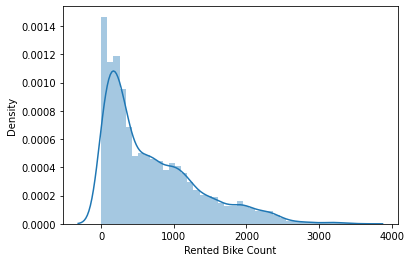

In [ ]:
sns.distplot(df_reg['Rented Bike Count'])

'Rented Bike Count' is positively skewed. So we will apply squre root transformation.

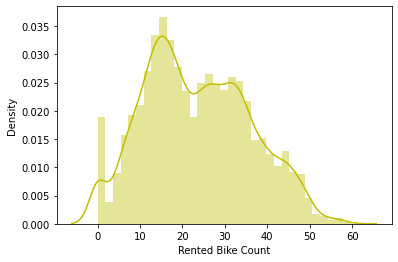

In [ ]:
sns.distplot(np.sqrt(df_reg['Rented Bike Count']),color='y')
plt.show()

In [ ]:
df_reg['Rented Bike Count']

0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented Bike Count, Length: 8760, dtype: int64

In [ ]:
dep_var ='Rented Bike Count'
ind_var = list(set(df_reg)-{dep_var})

In [ ]:
# defining numerical independent features
numeric_features = df_reg.describe().columns
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'month',
       'day_of_month'],
      dtype='object')

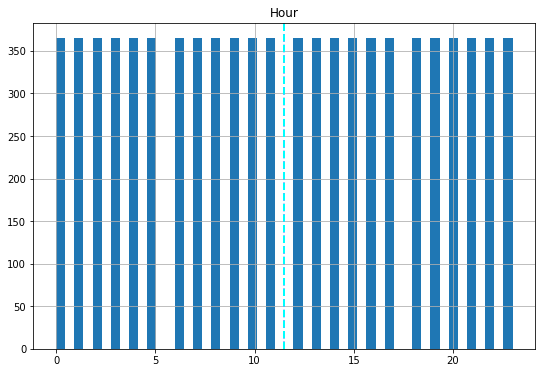

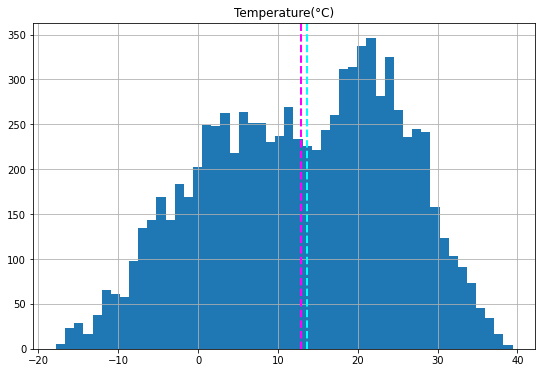

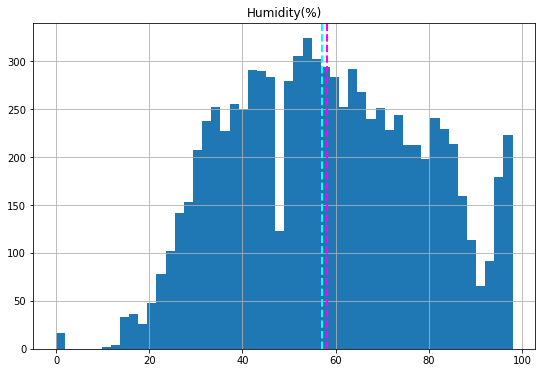

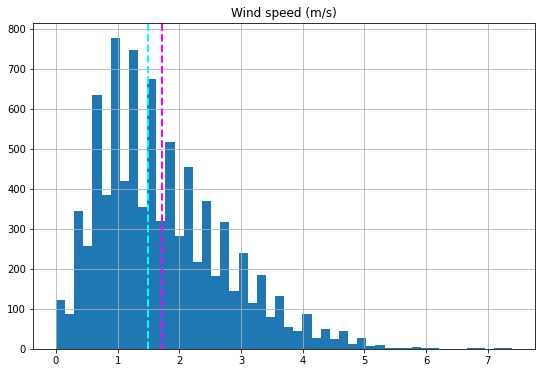

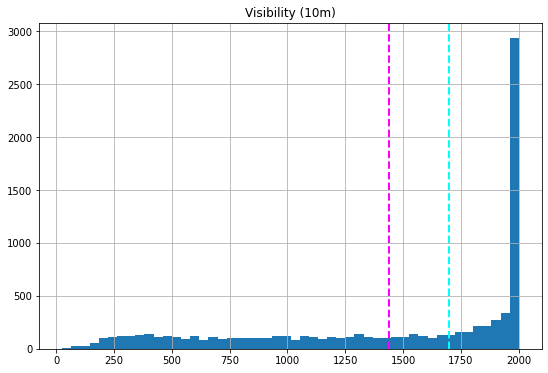

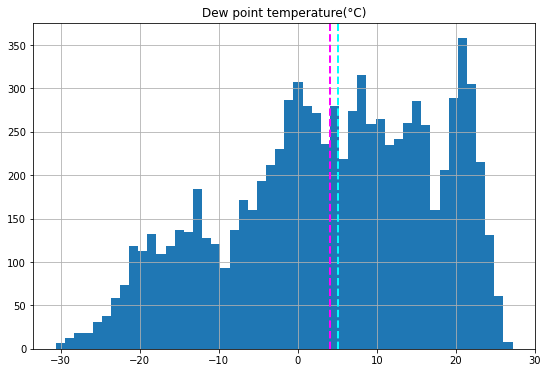

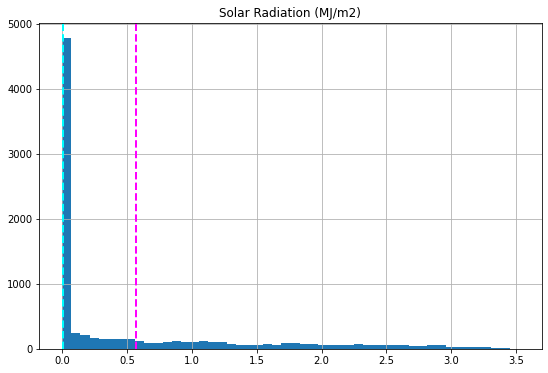

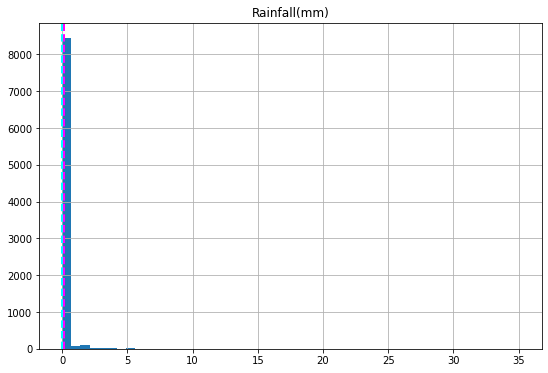

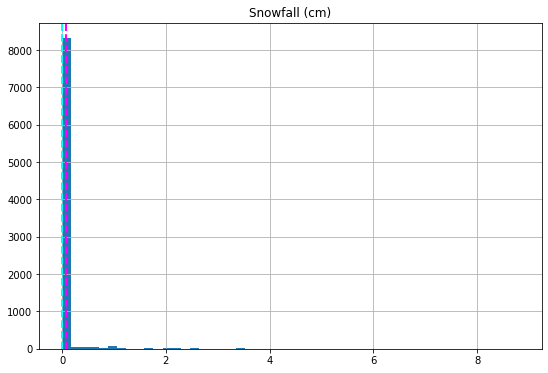

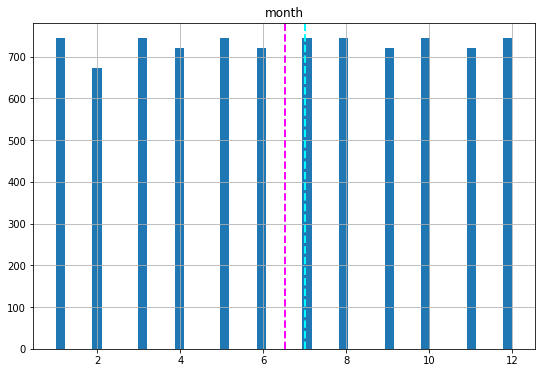

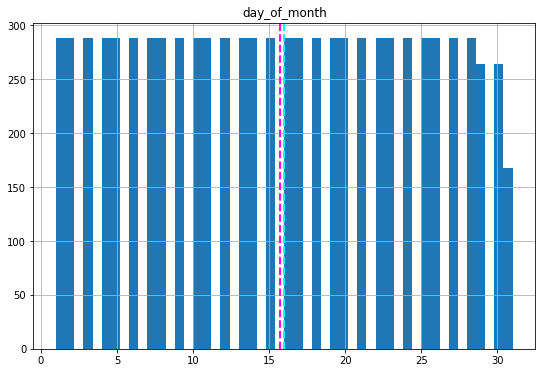

In [ ]:
# Plotting distribution of numerical independent features

for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df_reg[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

We see that many features are skewed, positive and negative and many are not. So we will apply sqrt transformation to only moderately to very skewed features

In [ ]:
# Selecting skewed features for transformation

skewed_features = []
for col in numeric_features:
  skewness = df_reg[col].skew(axis = 0)
  if skewness < -0.7 or skewness > 0.7:
    skewed_features.append(col)

In [ ]:
print(skewed_features)

['Rented Bike Count', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']


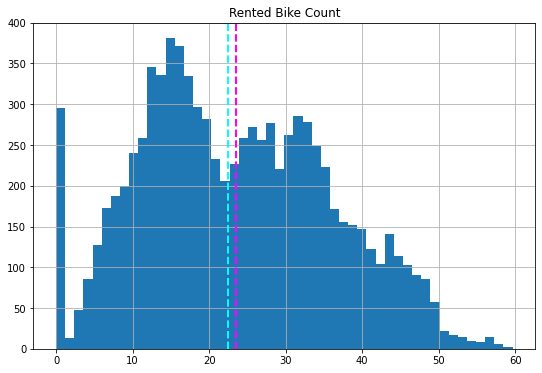

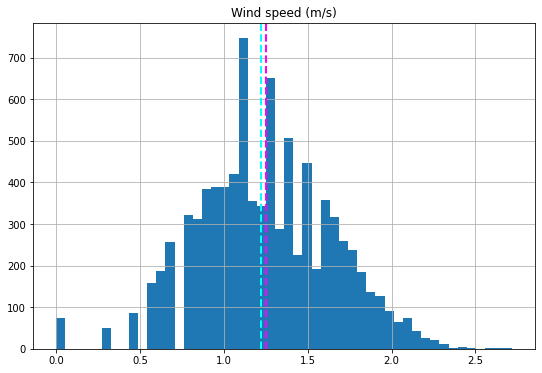

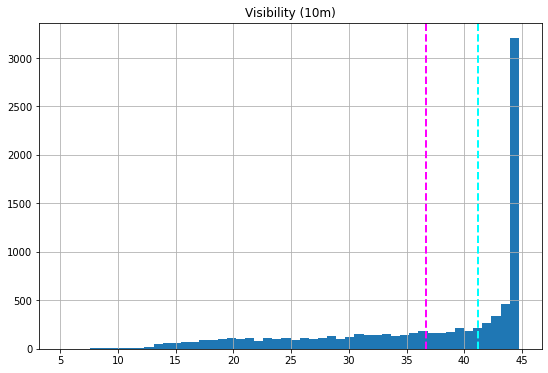

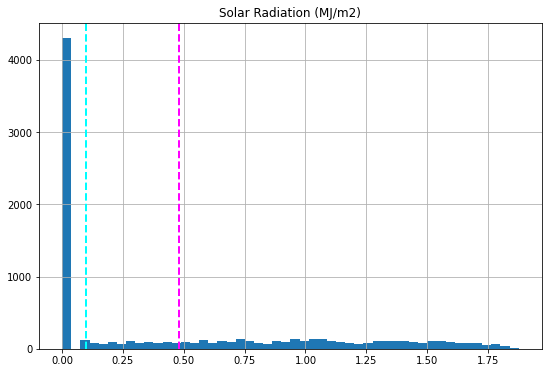

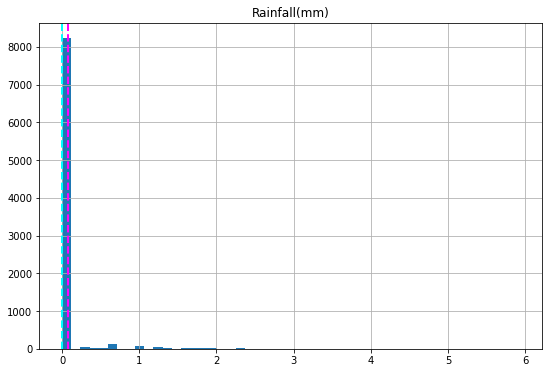

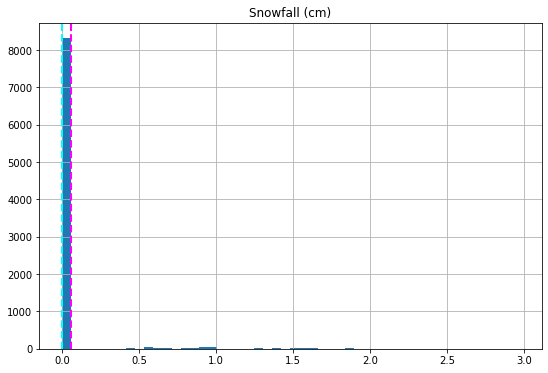

In [ ]:
# Applying sqrt transformation on skewed features and checking distribution

for col in skewed_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.sqrt(df_reg[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

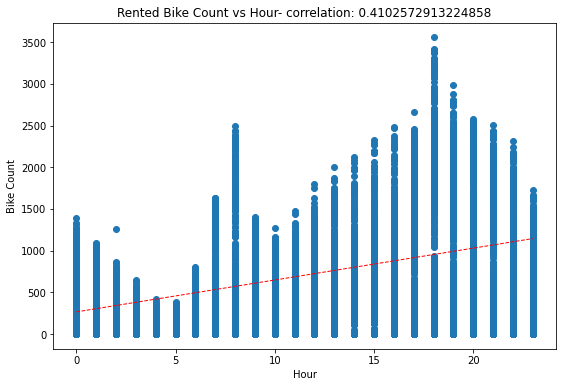

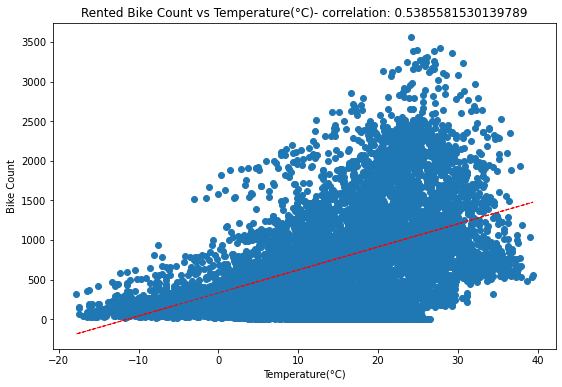

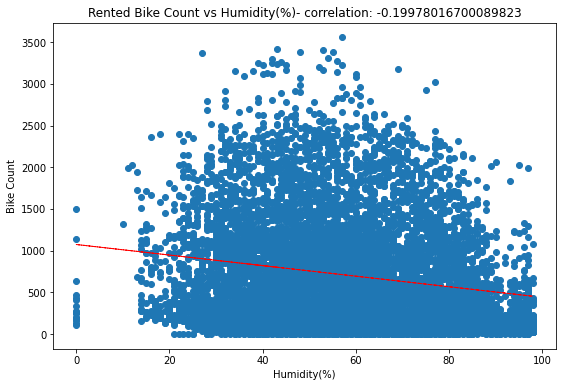

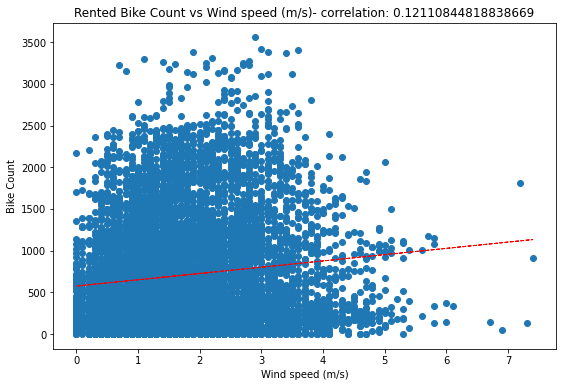

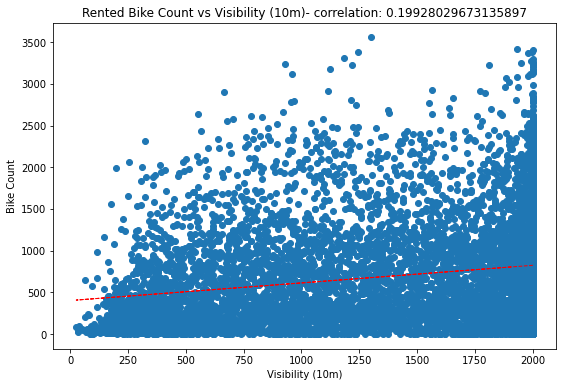

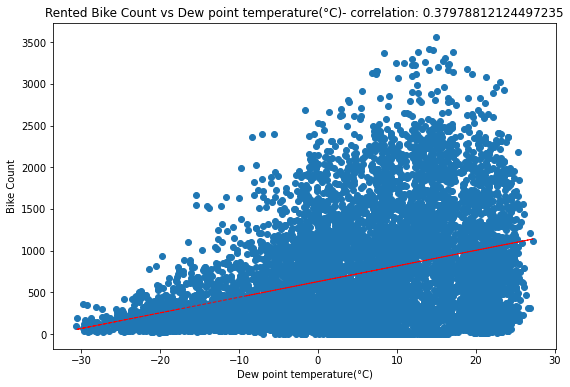

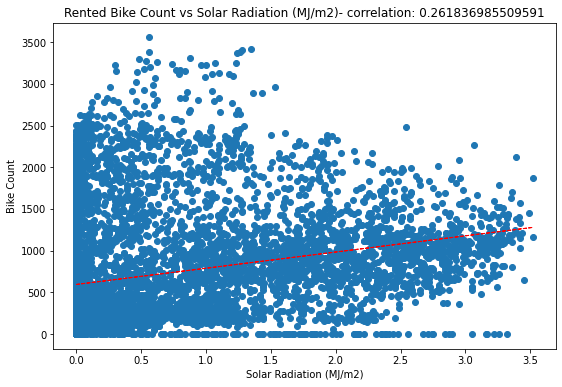

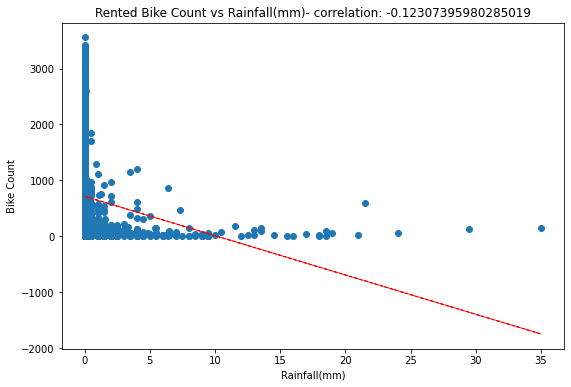

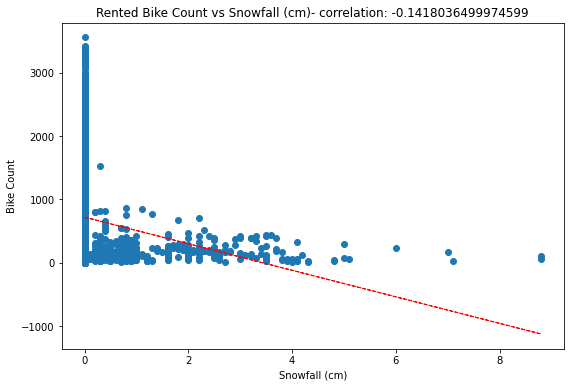

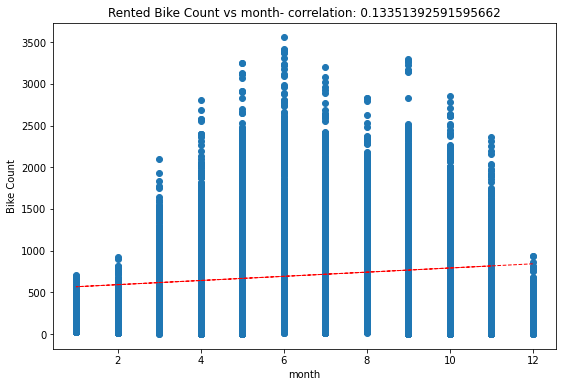

In [ ]:
for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df_reg[col]
    label = df_reg[dep_var]
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Bike Count')
    ax.set_title(dep_var+' vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df_reg[col], df_reg[dep_var], 1)
    y_hat = np.poly1d(z)(df_reg[col])

    plt.plot(df_reg[col], y_hat, "r--", lw=1)

plt.show()

Not very strong linear relation with any independet variable.

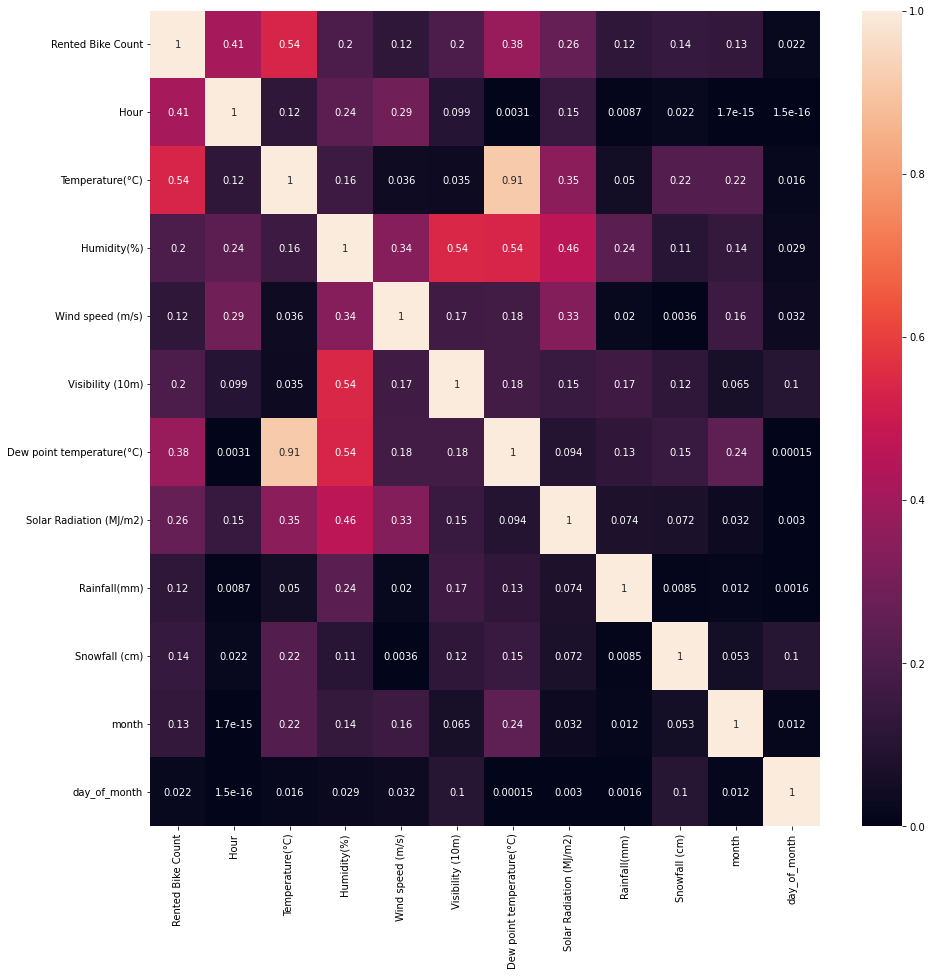

In [ ]:
plt.figure(figsize = (15,15))
corr_df = df_reg.corr()

sns.heatmap(data = np.abs(corr_df), annot = True)



'Temperature' and 'Dew point temperature are highly correlated.

Feature Selection

Using VIF to remove multicollinearity.

VIF score should be less than 5 for no multicollinearity.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df_reg[[i for i in df_reg.describe().columns if i not in ["Rented Bike Count"]]])

,variables,VIF
0,Hour,4.425960
1,Temperature(°C),38.389623
2,Humidity(%),8.344305
3,Wind speed (m/s),4.879565
4,Visibility (10m),9.481423
5,Dew point temperature(°C),19.815223
6,Solar Radiation (MJ/m2),2.900819
7,Rainfall(mm),1.082134
8,Snowfall (cm),1.144168
9,month,5.096115


In [ ]:
df_reg.drop(columns = ['Dew point temperature(°C)'],axis = 0, inplace = True)

In [ ]:
calc_vif(df_reg[[i for i in df_reg.describe().columns if i not in ["Rented Bike Count"]]])

,variables,VIF
0,Hour,3.997641
1,Temperature(°C),3.288024
2,Humidity(%),6.802299
3,Wind speed (m/s),4.667341
4,Visibility (10m),5.471035
5,Solar Radiation (MJ/m2),2.275006
6,Rainfall(mm),1.080689
7,Snowfall (cm),1.139759
8,month,5.027060
9,day_of_month,3.776455


In [ ]:
df_reg.drop(columns = ['Humidity(%)'],axis = 0, inplace = True)

In [ ]:
calc_vif(df_reg[[i for i in df_reg.describe().columns if i not in ["Rented Bike Count"]]])

,variables,VIF
0,Hour,3.986126
1,Temperature(°C),2.829777
2,Wind speed (m/s),4.377753
3,Visibility (10m),5.444438
4,Solar Radiation (MJ/m2),1.915451
5,Rainfall(mm),1.047934
6,Snowfall (cm),1.117859
7,month,4.263038
8,day_of_month,3.350386


In [ ]:
df_reg.drop(columns = ['Visibility (10m)'],axis = 0, inplace = True)

In [ ]:
skewed_features.remove('Visibility (10m)')

In [ ]:
calc_vif(df_reg[[i for i in df_reg.describe().columns if i not in ["Rented Bike Count"]]])

,variables,VIF
0,Hour,3.841609
1,Temperature(°C),2.823886
2,Wind speed (m/s),3.848706
3,Solar Radiation (MJ/m2),1.911904
4,Rainfall(mm),1.030481
5,Snowfall (cm),1.107027
6,month,3.626975
7,day_of_month,3.229677


In [ ]:
#numeric_features = list(numeric_features)

In [ ]:
#a = ['Dew point temperature(°C)']
#for i in a:
#numeric_features.remove('Dew point temperature(°C)')


In [ ]:
df_reg['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df_reg['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [ ]:
df_reg['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [ ]:
# preparing data for training model

df_reg=pd.get_dummies(df_reg,columns=['Seasons'])

holiday_l = LabelEncoder()
fday_l = LabelEncoder()


df_reg['holiday_n'] = holiday_l.fit_transform(df_reg['Holiday'])
df_reg['fday_n'] = fday_l.fit_transform(df_reg['Functioning Day'])

In [ ]:
df_reg.drop(columns = ['Functioning Day','Holiday'], inplace = True)

In [ ]:
df_reg.head()

,Rented Bike Count,Hour,Temperature(°C),Wind speed (m/s),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,day_of_month,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,holiday_n,fday_n
0,254,0,-5.2,2.2,0.0,0.0,0.0,12,1,0,0,0,1,1,1
1,204,1,-5.5,0.8,0.0,0.0,0.0,12,1,0,0,0,1,1,1
2,173,2,-6.0,1.0,0.0,0.0,0.0,12,1,0,0,0,1,1,1
3,107,3,-6.2,0.9,0.0,0.0,0.0,12,1,0,0,0,1,1,1
4,78,4,-6.0,2.3,0.0,0.0,0.0,12,1,0,0,0,1,1,1


In [ ]:
features = list(set(df_reg.columns) - {'Rented Bike Count'})

In [ ]:
# Applying sqrt transformation on skewed features
for col in skewed_features:
  df_reg[col] = df_reg[col].apply(lambda x: np.sqrt(x))

In [ ]:
# rescaling features
from scipy.stats import zscore

df_reg[features] = df_reg[features].apply(zscore)

In [ ]:
# Splitting dataframe into training and testing dataset

x_train, x_test, y_train, y_test = data_split(df_reg)

In [ ]:
# Defining model and training model

from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x_train, y_train)

In [ ]:
# Evaluating model

test_r2_lr ,train_r2_lr = evaluating_model(reg, x_train, x_test, y_train, y_test,False)

Test Mean squred error : 55.26072089355217
Train mean squred error : 52.60077263139673


In [ ]:
test_r2['Linear Regression'] = test_r2_lr
train_r2['Linear Regression'] = train_r2_lr

In [ ]:
print(f"R2-Score for training dataset : {train_r2_lr}")
print(f"R2-Score for testing dataset : {test_r2_lr}")

R2-Score for training dataset : 0.6612574747113851
R2-Score for testing dataset : 0.6409696922254262


# **2)Lasso**

In [ ]:
from sklearn.linear_model import Lasso, Ridge
# Defining model and training model
lasso = Lasso( )
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,0.0014]}

lasso_model = gridsearch_model_parameters(lasso, parameters, x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters of optimal model: {'alpha': 0.01}


In [ ]:
test_r2_ls ,train_r2_ls = evaluating_model(lasso_model, x_train, x_test, y_train, y_test, True)

Test Mean squred error : 55.25363847934859
Train mean squred error : 52.600802693193856


In [ ]:
test_r2['Lasso'] = test_r2_ls
train_r2['Lasso'] = train_r2_ls

In [ ]:
print(f"R2-Score for training dataset : {train_r2_ls}")
print(f"R2-Score for testing dataset : {test_r2_ls}")

R2-Score for training dataset : 0.5770564658862314
R2-Score for testing dataset : 0.5527118733856988


# **3) Ridge**

In [ ]:
# Defining model and training model

from sklearn.linear_model import  Ridge


ridge = Ridge()
parameters = {'alpha': [1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,0.0014]}
ridge_model = gridsearch_model_parameters(ridge, parameters, x_train, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters of optimal model: {'alpha': 20}


In [ ]:
# Evaluating model

test_r2_rg ,train_r2_rg = evaluating_model(ridge_model, x_train, x_test, y_train, y_test, False)

Test Mean squred error : 55.25251393957152
Train mean squred error : 52.60081795187103


In [ ]:
test_r2['Ridge'] = test_r2_rg
train_r2['Ridge'] = train_r2_rg

In [ ]:
print(f"R2-Score for training dataset : {train_r2_rg}")
print(f"R2-Score for testing dataset : {test_r2_rg}")

R2-Score for training dataset : 0.6612571828530883
R2-Score for testing dataset : 0.6410230130139705


# **4)Elastic net**

In [ ]:
# Defining model

from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,0.0014],'l1_ratio':[0.5,0.6,0.7,0.8]}
en_regressor = gridsearch_model_parameters(elasticnet, parameters, x_train, y_train)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters of optimal model: {'alpha': 0.0014, 'l1_ratio': 0.8}


In [ ]:
# Evaluating model

test_r2_en ,train_r2_en = evaluating_model(en_regressor, x_train, x_test, y_train, y_test, True)

Test Mean squred error : 55.270534568723235
Train mean squred error : 52.5999105757106


In [ ]:
test_r2['ElasticNet'] = test_r2_en
train_r2['ElasticNet'] = train_r2_en

In [ ]:
print(f"R2-Score for training dataset : {train_r2_en}")
print(f"R2-Score for testing dataset : {test_r2_en}")

R2-Score for training dataset : 0.5773603519484618
R2-Score for testing dataset : 0.5528934324829389


# **5) Decision Tree Regressor**

In [ ]:
# importing Decision tree regressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
data=df.copy()

In [ ]:
# Preparing data for training model

data=pd.get_dummies(data,columns=['Seasons'])
# Label encoding the holiday and functioning day
holiday_l = LabelEncoder()
fday_l = LabelEncoder()

data['holiday_n'] = holiday_l.fit_transform(data['Holiday'])
data['fday_n'] = fday_l.fit_transform(data['Functioning Day'])

In [ ]:
# Drop the original column State from the dataframe
data.drop(columns = ['Holiday','Functioning Day'], inplace = True)

In [ ]:
# splitting dataframe

x_train, x_test, y_train, y_test = data_split(data)

In [ ]:
# Defining parameter dictionary for hyperparameter tuning

max_leaf_nodes = [7,9,10,15,20]
max_depth = [2,4,5]
min_samples_split = [3,5,6]

param_dict = {'max_leaf_nodes' : max_leaf_nodes,'max_depth' : max_depth,'min_samples_split' : min_samples_split}

In [ ]:
# Defining model and traing model
regressor = DecisionTreeRegressor( random_state=0)

optimal_model = gridsearch_model_parameters(regressor, param_dict, x_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best Parameters of optimal model: {'max_depth': 5, 'max_leaf_nodes': 20, 'min_samples_split': 3}


In [ ]:
#Evaluating model
test_r2_dt,train_r2_dt = evaluating_model(optimal_model, x_train, x_test, y_train, y_test)

Test Mean squred error : 125508.37544511296
Train mean squred error : 113611.95535322157


In [ ]:
test_r2['Decision tree'] = test_r2_dt
train_r2['Decision tree'] = train_r2_dt

In [ ]:
print(f"R2-Score for training dataset : {train_r2_dt}")
print(f"R2-Score for testing dataset : {test_r2_dt}")

R2-Score for training dataset : 0.7267669865897723
R2-Score for testing dataset : 0.698765129536723


# **6)Random Forest**

In [ ]:

from sklearn.ensemble import RandomForestRegressor

In [ ]:
# defing random forest regressor and parameter dictionary for hyperparameter tuning
rf_regressor = RandomForestRegressor()

param_dict = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}

optimal_model = gridsearch_model_parameters(rf_regressor, param_dict, x_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters of optimal model: {'max_depth': 7, 'n_estimators': 100}


In [ ]:
# Evaluating model
test_r2_rf,train_r2_rf = evaluating_model(optimal_model, x_train, x_test, y_train, y_test)

Test Mean squred error : 79946.07507586731
Train mean squred error : 65245.54696762271


In [ ]:
test_r2['Random forest'] = test_r2_rf
train_r2['Random forest'] = train_r2_rf

In [ ]:
print(f"R2-Score for training dataset : {train_r2_rf}")
print(f"R2-Score for testing dataset : {test_r2_rf}")

R2-Score for training dataset : 0.8430866069144141
R2-Score for testing dataset : 0.8081200120380967


# **XGBoost**

In [ ]:
from xgboost import XGBRegressor

In [ ]:
# defing XG Boost regressor and parameter dictionary for hyperparameter tuning
xg_regressor = XGBRegressor()

param_dict = {'n_estimators':[50, 80, 100], 'max_depth':[3, 5, 7]}

optimal_model = gridsearch_model_parameters(xg_regressor, param_dict, x_train, y_train)

In [ ]:
# Evaluating model
test_r2_xg,train_r2_xg = evaluating_model(optimal_model, x_train, x_test, y_train, y_test)

Test Mean squred error : 48652.417447803346
Train mean squred error : 15985.983508390778


In [ ]:
test_r2['XG Boost'] = test_r2_xg
train_r2['XG Boost'] = train_r2_xg

In [ ]:
print(f"R2-Score for training dataset : {train_r2_xg}")
print(f"R2-Score for testing dataset : {test_r2_xg}")

R2-Score for training dataset : 0.9615542357954853
R2-Score for testing dataset : 0.883228472875712


# **Comparing Models**

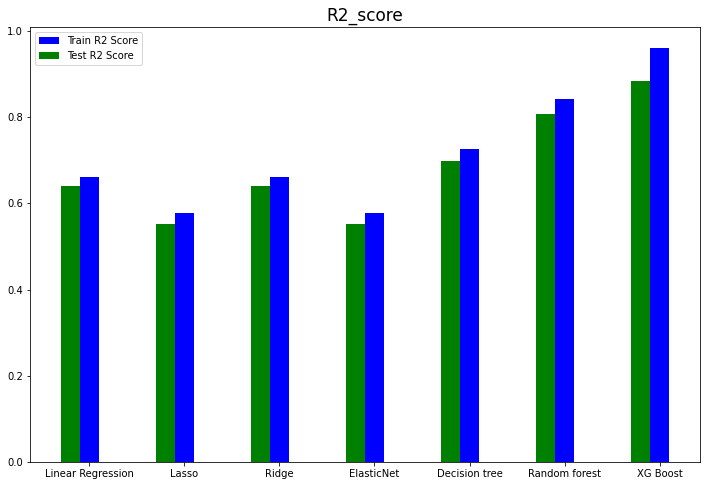

In [ ]:
plt.figure(figsize = (12,8))
X = np.arange(len(train_r2))
ax = plt.subplot(111)
ax.bar(X, train_r2.values(), width=0.2, color='b', align='center')
ax.bar(X-0.2, test_r2.values(), width=0.2, color='g', align='center')
ax.legend(('Train R2 Score','Test R2 Score'))
plt.xticks(X, test_r2.keys())
plt.title("R2_score", fontsize=17)
plt.show()